In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('./supermarket_sales_sheet.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
data["Date"] = pd.to_datetime(data["Date"])
data["Hour"] = pd.to_datetime(data["Time"]).dt.hour
data.dtypes

/tmp/ipykernel_6592/2665013136.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Hour"] = pd.to_datetime(data["Time"]).dt.hour


Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Hour                                int32
dtype: object

In [8]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


In [9]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Hour                       0
dtype: int64

### Exploratory analysis

#### Total sales per branch

In [10]:
total_sales_by_branch = data.groupby("Branch")["Total"].sum()
total_sales_by_branch

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

<Axes: xlabel='Branch'>

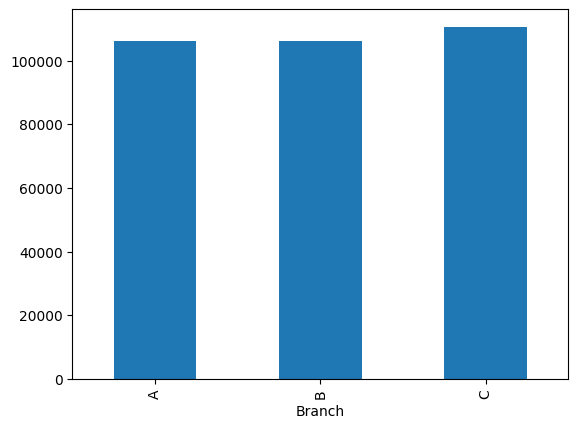

In [11]:
total_sales_by_branch.plot.bar()

In [12]:
branch_total_sales = total_sales_by_branch.values.tolist()
branch_total_sales

[106200.3705, 106197.672, 110568.7065]

In [13]:
branch_names = total_sales_by_branch.index.tolist()
branch_names

['A', 'B', 'C']

In [14]:
return_total_sales_by_branch = {"labels":branch_names, "data":branch_total_sales,"label":"Total Sales Per Branch"}
return_total_sales_by_branch

{'labels': ['A', 'B', 'C'],
 'data': [106200.3705, 106197.672, 110568.7065],
 'label': 'Total Sales Per Branch'}

#### Sales by Gender

In [15]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
sales_by_gender = data.groupby("Gender")["Total"].sum()
sales_by_gender

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [17]:
gender_names = sales_by_gender.index.tolist()
gender_names

['Female', 'Male']

In [18]:
gender_sales = sales_by_gender.values.tolist()
gender_sales

[167882.925, 155083.824]

In [19]:
return_sales_by_gender = {"labels":gender_names,"data":gender_sales,"label":"Total sales by gender"}
return_sales_by_gender

{'labels': ['Female', 'Male'],
 'data': [167882.925, 155083.824],
 'label': 'Total sales by gender'}

#### Function Definition

In [20]:
def univariate_data_analysis(group_by:str,interested_column:str,title:str)->dict:
    """
    This function is used to perform univariate analysis on the data
    """
    group_by_column = data.groupby(group_by)[interested_column].sum().sort_values(ascending=False)
    group_by_column_values = group_by_column.values.tolist()
    group_by_column_names = group_by_column.index.tolist()
    return {"labels":group_by_column_names,"data":group_by_column_values,"label":title}

#### Gross Income by branch

In [21]:
gross_income_data = univariate_data_analysis("Branch","gross income","Gross Income by Branch")
gross_income_data

{'labels': ['C', 'A', 'B'],
 'data': [5265.1765, 5057.1605, 5057.032],
 'label': 'Gross Income by Branch'}

#### Product Line by total sales

In [22]:
product_line_by_total_sales = univariate_data_analysis("Product line","Total","Total Sales by Product Line")
product_line_by_total_sales

{'labels': ['Food and beverages',
  'Sports and travel',
  'Electronic accessories',
  'Fashion accessories',
  'Home and lifestyle',
  'Health and beauty'],
 'data': [56144.844, 55122.8265, 54337.5315, 54305.895, 53861.913, 49193.739],
 'label': 'Total Sales by Product Line'}

#### Product line by gross income

In [23]:
product_line_by_gross_income = univariate_data_analysis("Product line","gross income","Gross Income by Product Line")
product_line_by_gross_income

{'labels': ['Food and beverages',
  'Sports and travel',
  'Electronic accessories',
  'Fashion accessories',
  'Home and lifestyle',
  'Health and beauty'],
 'data': [2673.564, 2624.8965, 2587.5015, 2585.995, 2564.853, 2342.559],
 'label': 'Gross Income by Product Line'}